# Supervised learning mutliclass & metrics

<img src="https://miro.medium.com/max/700/1*x7P7gqjo8k2_bj2rTQWAfg.jpeg" width="400" />
<img src="https://cdn-images-1.medium.com/max/1000/1*erhS3Y1ZtN3bcJAYgaLC_g.gif" width="300" />
<img src="https://img.devrant.com/devrant/rant/r_1587555_kpz6c.jpg" width="300"/>

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Titanic dataset
df = pd.read_csv("data/titanic_feats.csv")
df.head()
X = df.drop(columns=["y"])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 11) (179, 11) (712,) (179,)


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

models = {
    "logis": LogisticRegression(C=10,solver="lbfgs"),
    "svm-linear": CalibratedClassifierCV(LinearSVC(),cv=3),
    "svm-rbf": CalibratedClassifierCV(SVC(kernel="sigmoid",gamma="auto"),cv=3),
    "randomforest": RandomForestClassifier(n_estimators=100),
}

# Train all the models in the models dict
for name,m  in models.items():
    print(f"Training {name}...")
    m.fit(X_train, y_train)
print("Train complete")



Training logis...
Training svm-linear...
Training svm-rbf...
Training randomforest...
Train complete


## Metrics


<img src="https://cdn-images-1.medium.com/fit/t/1600/480/1*Ub0nZTXYT8MxLzrz0P7jPA.png" width="600"/>

* **Accuracy:** `Accuracy = N/NGT`
  - `N` number of correctly classified samples
  - `NGT` Total number of samples to be classified
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
* **Precision:** `tp / (tp + fp)`
  - The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
* **Recall** `tp / (tp + fn)`
  - The recall is intuitively the ability of the classifier to find all the positive samples.
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
  
* **F1Score**: `F1 = 2 * (precision * recall) / (precision + recall)`

  - The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

```python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
```

<img src="https://upl7s2nmwf2w5a6vghztmvqp-wpengine.netdna-ssl.com/wp-content/uploads/2018/08/Figure-2-ivu.jpg" width="400"/>

<img src="https://miro.medium.com/max/4420/1*btcfBuM5Eqqc6rJ3iw3sNQ.png" width="400"/>



### Difference between model evaluation metrics
* **Accuracy vs Precision** -> https://en.wikipedia.org/wiki/Accuracy_and_precision
* **Precision & Recall**
  - https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
  - https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
  
### Refs
- https://scikit-learn.org/stable/modules/model_evaluation.html


In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluating model {name}")
    printMetric("Accuracy",accuracy_score(y_test, y_pred))
    printMetric("Precision",precision_score(y_test, y_pred))
    printMetric("Recall",recall_score(y_test, y_pred))
    printMetric("F1Score",f1_score(y_test, y_pred))

print("Train complete")

Evaluating model logis
	 Accuracy: 0.816
	 Precision: 0.73
	 Recall: 0.742
	 F1Score: 0.736
Evaluating model svm-linear
	 Accuracy: 0.81
	 Precision: 0.726
	 Recall: 0.726
	 F1Score: 0.726
Evaluating model svm-rbf
	 Accuracy: 0.799
	 Precision: 0.724
	 Recall: 0.677
	 F1Score: 0.7
Evaluating model randomforest
	 Accuracy: 0.804
	 Precision: 0.701
	 Recall: 0.758
	 F1Score: 0.729
Train complete



## ROC Curve and AUC
Receiver Operator Characteristic Curve from `sklearn.metrics`
- http://arogozhnikov.github.io/2015/10/05/roc-curve.html
- http://www.navan.name/roc/

```python
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])

# Extract AUC score
roc_auc_score(y_true, y_scores)

# Extract ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y, y_scores, pos_label=1)
```


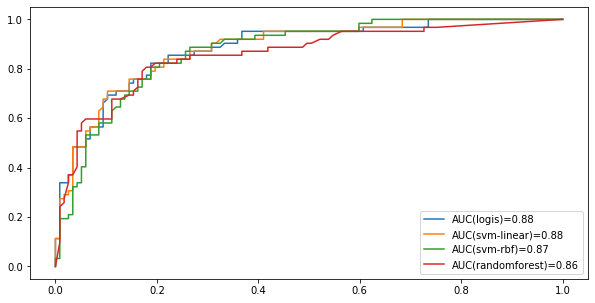

In [83]:
%matplotlib inline
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
analyzeModels = {
    name:model for name, model in models.items() if name in ["logis","randomforest","svm-linear","svm-rbf"]
}

plt.figure(figsize=(10,5))
aucs = []
for name, model in analyzeModels.items():
    y_scores = model.predict_proba(X_test)
    
    alive_scores = y_scores[:,1]
    
    # Extract AUC score
    auc = roc_auc_score(y_test, alive_scores)
    aucs.append(f"AUC({name})={round(auc,2)}")
    # Extract ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, alive_scores, pos_label=1)
    plt.plot(fpr,tpr)

plt.legend(aucs)
    


## Cross validation

`from sklearn.model_selection import cross_val_score`

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500"/>

In [91]:
import numpy as np
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10)
    print(f"({name}) acccuracy={np.mean(scores)}")


(logis) acccuracy=0.7935035750766088
(svm-linear) acccuracy=0.7912813528543865
(svm-rbf) acccuracy=0.7900942004312791
(randomforest) acccuracy=0.7902701168993305


## Deep dive on ROC curve


- **ROC**: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

- **ROC with Cross Validation**: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py


## Extract a basic report

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

```python
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Precision, Recall, F1-Score & Support
print(classification_report(y_test,y_pred))
# Accuracy Score -> in mutliclass is computed with jaccard_score
print(accuracy_score(y_test, y_pred))
```

In [95]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"MODEL -> {name}")
    print(classification_report(y_test,y_pred))

    

MODEL -> logis
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       117
           1       0.73      0.74      0.74        62

   micro avg       0.82      0.82      0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

MODEL -> svm-linear
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.73      0.73      0.73        62

   micro avg       0.81      0.81      0.81       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

MODEL -> svm-rbf
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       117
           1       0.72      0.68      0.70        62

   micro avg       0.80      0.80      0.80       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.8

## Multiclass models training

While some models can handle mutliclass data inherently, some others require a strategy to **convert** the mutliclass problem into **multiple binary classification problems**.
- Multiclass as **One-Vs-One**
- Multiclass as **One-Vs-The-Rest**

- https://scikit-learn.org/stable/modules/multiclass.html

In [126]:
from sklearn import datasets, svm, metrics
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import classification_report

# Mnist dataset
digits = datasets.load_digits()

X = digits["data"]
y = digits["target"]
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = svm.SVC(gamma=0.001)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

(1797, 64) (1797,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        33
           5       0.97      0.97      0.97        35
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        35
           8       1.00      1.00      1.00        34
           9       0.98      0.98      0.98        41

   micro avg       0.99      0.99      0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



## Multiclass metrics 

* **Balanced accuracy score:** The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.
    - `sklearn.metrics.balanced_accuracy_score`
* **Weighted ROC Curve for multiclass & multilabel:** `sklearn.metrics.roc_auc_score`
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

* **Confussion matrix:** Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

```python
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
```

**Note:** Confussion Matrix can be ploted with seaborn heatmap
- https://seaborn.pydata.org/generated/seaborn.heatmap.html

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  1]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  0  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


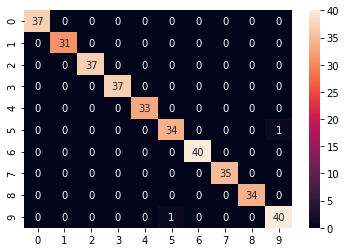

In [127]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm,annot=True)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  1]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  0  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


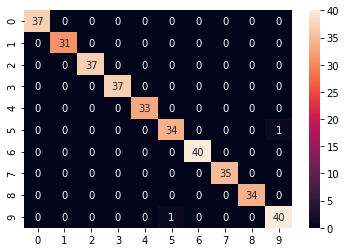

In [141]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Absolute confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm,annot=True)

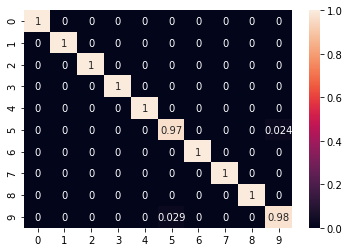

In [142]:
# Normalized confusion matrix

cm = confusion_matrix(y_test,y_pred)
totals_per_class = pd.Series(y_test).value_counts().sort_index()
cm_percent = cm/totals_per_class[None,:]
sns.heatmap(cm_percent,annot=True)

In [145]:
import random
random.choice(["Felipe","Ovi"])

'Ovi'